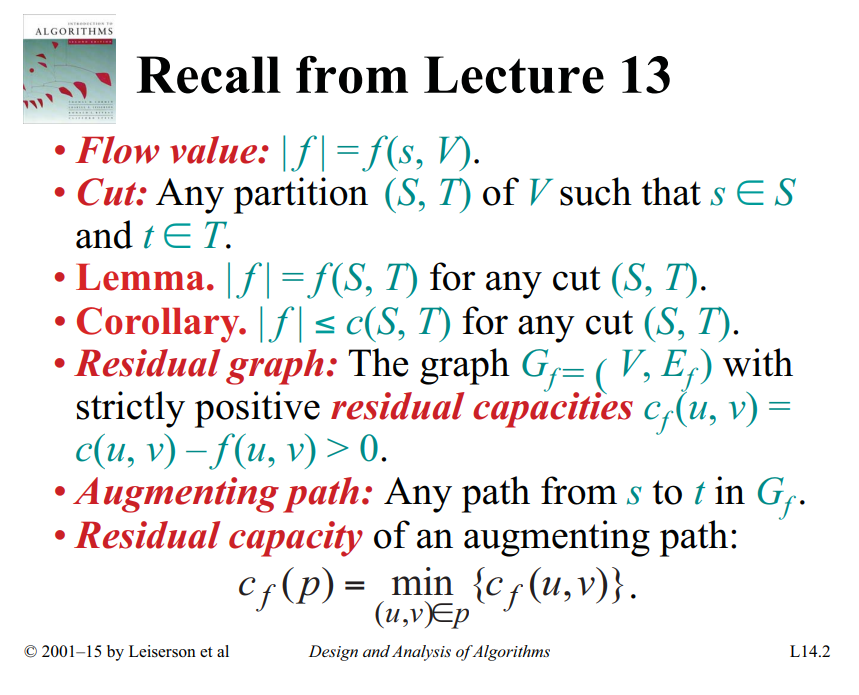

In [3]:
from collections import deque

class FlowNetwork:
    def __init__(self, vertices):
        self.vertices = vertices
        self.adjacency_list = {v: [] for v in vertices}
        self.capacity = {}

    def add_edge(self, u, v, capacity):
        self.adjacency_list[u].append(v)
        self.adjacency_list[v].append(u)
        self.capacity[(u, v)] = capacity
        # Initialize reverse edge with zero capacity if not already present
        if (v, u) not in self.capacity:
            self.capacity[(v, u)] = 0

    def bfs(self, source, sink, parent):
        visited = {v: False for v in self.vertices}
        queue = deque([source])
        visited[source] = True

        while queue:
            u = queue.popleft()

            for v in self.adjacency_list[u]:
                if not visited[v] and self.capacity[(u, v)] > 0:  # Check if residual capacity > 0
                    queue.append(v)
                    visited[v] = True
                    parent[v] = u
                    if v == sink:
                        return True
        return False

    def ford_fulkerson(self, source, sink):
        parent = {v: None for v in self.vertices}
        max_flow = 0

        while self.bfs(source, sink, parent):
            path_flow = float('Inf')
            v = sink

            # Find the minimum capacity along the path
            while v != source:
                u = parent[v]
                path_flow = min(path_flow, self.capacity[(u, v)])
                v = u

            # Update capacities of the edges and their reverse edges
            v = sink
            while v != source:
                u = parent[v]
                self.capacity[(u, v)] -= path_flow
                self.capacity[(v, u)] += path_flow
                v = u

            max_flow += path_flow

        return max_flow

# Example usage:
vertices = ['s', 'A', 'B', 'C', 't']
network = FlowNetwork(vertices)
network.add_edge('s', 'A', 10)
network.add_edge('s', 'B', 5)
network.add_edge('A', 'B', 15)
network.add_edge('A', 'C', 5)
network.add_edge('B', 'C', 10)
network.add_edge('C', 't', 10)

source = 's'
sink = 't'
max_flow = network.ford_fulkerson(source, sink)
print("Maximum flow:", max_flow)


Maximum flow: 10


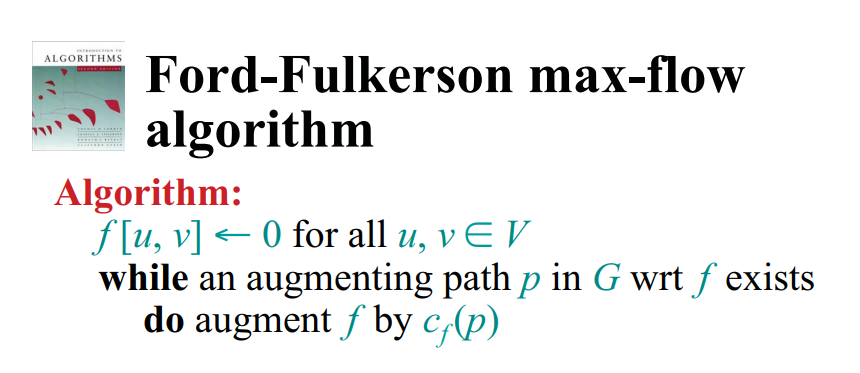

In [4]:
from collections import deque, defaultdict

class FlowNetwork:
    def __init__(self):
        self.adjacency_list = defaultdict(dict)

    def add_edge(self, u, v, capacity):
        self.adjacency_list[u][v] = capacity
        self.adjacency_list[v][u] = 0  # Initialize reverse edge with zero capacity

    def bfs(self, source, sink, parent):
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            u = queue.popleft()

            for v in self.adjacency_list[u]:
                if v not in visited and self.adjacency_list[u][v] > 0:  # Residual capacity > 0
                    queue.append(v)
                    visited.add(v)
                    parent[v] = u
                    if v == sink:
                        return True

        return False

    def ford_fulkerson(self, source, sink):
        parent = {}
        max_flow = 0

        while self.bfs(source, sink, parent):
            # Find the maximum flow through the path found by BFS
            path_flow = float('Inf')
            v = sink

            while v != source:
                u = parent[v]
                path_flow = min(path_flow, self.adjacency_list[u][v])
                v = u

            # Update capacities of the edges and reverse edges along the path
            v = sink
            while v != source:
                u = parent[v]
                self.adjacency_list[u][v] -= path_flow
                self.adjacency_list[v][u] += path_flow
                v = u

            max_flow += path_flow

            # Clear parent dictionary for next BFS
            parent = {}

        return max_flow

# Example usage:
network = FlowNetwork()

# Add edges with capacities to the flow network
network.add_edge('s', 'A', 10)
network.add_edge('s', 'B', 5)
network.add_edge('A', 'B', 15)
network.add_edge('A', 'C', 5)
network.add_edge('B', 'C', 10)
network.add_edge('C', 't', 10)

# Compute the maximum flow from source 's' to sink 't' using Ford-Fulkerson algorithm
source = 's'
sink = 't'
max_flow = network.ford_fulkerson(source, sink)
print("Maximum flow:", max_flow)

Maximum flow: 10


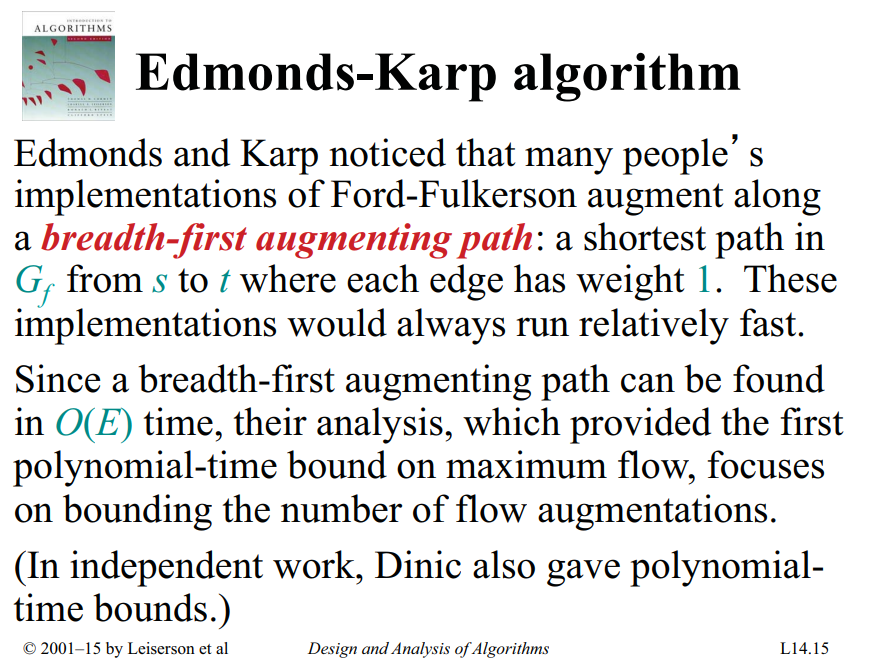

In [5]:
from collections import deque, defaultdict

class FlowNetwork:
    def __init__(self):
        self.adjacency_list = defaultdict(dict)

    def add_edge(self, u, v, capacity):
        self.adjacency_list[u][v] = capacity
        self.adjacency_list[v][u] = 0  # Initialize reverse edge with zero capacity

    def bfs(self, source, sink, parent):
        visited = set()
        queue = deque([source])
        visited.add(source)

        while queue:
            u = queue.popleft()

            for v in self.adjacency_list[u]:
                if v not in visited and self.adjacency_list[u][v] > 0:  # Residual capacity > 0
                    queue.append(v)
                    visited.add(v)
                    parent[v] = u
                    if v == sink:
                        return True

        return False

    def edmonds_karp(self, source, sink):
        parent = {}
        max_flow = 0

        while self.bfs(source, sink, parent):
            # Find the maximum flow through the path found by BFS
            path_flow = float('Inf')
            v = sink

            while v != source:
                u = parent[v]
                path_flow = min(path_flow, self.adjacency_list[u][v])
                v = u

            # Update capacities of the edges and reverse edges along the path
            v = sink
            while v != source:
                u = parent[v]
                self.adjacency_list[u][v] -= path_flow
                self.adjacency_list[v][u] += path_flow
                v = u

            max_flow += path_flow

            # Clear parent dictionary for next BFS
            parent = {}

        return max_flow

# Example usage:
network = FlowNetwork()

# Add edges with capacities to the flow network
network.add_edge('s', 'A', 10)
network.add_edge('s', 'B', 5)
network.add_edge('A', 'B', 15)
network.add_edge('A', 'C', 5)
network.add_edge('B', 'C', 10)
network.add_edge('C', 't', 10)

# Compute the maximum flow from source 's' to sink 't' using Edmonds-Karp algorithm
source = 's'
sink = 't'
max_flow = network.edmonds_karp(source, sink)
print("Maximum flow (Edmonds-Karp):", max_flow)


Maximum flow (Edmonds-Karp): 10


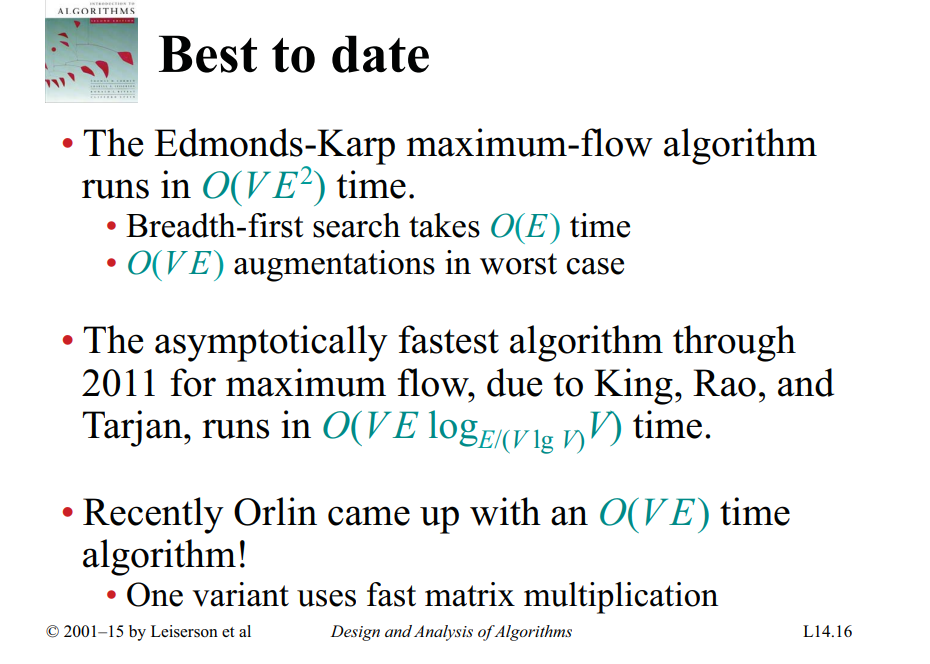

King, Ran and Tarjan Algorithm (2011)

In [7]:
import networkx as nx

def maximum_flow_algorithm(graph, source, sink):
    # Compute maximum flow from source to sink
    flow_value, flow_dict = nx.maximum_flow(graph, source, sink)
    return flow_value, flow_dict

# Example usage:
if __name__ == "__main__":
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges along with their capacities
    G.add_edge('s', 'a', capacity=10)  # Source to node a with capacity 10
    G.add_edge('s', 'b', capacity=5)   # Source to node b with capacity 5
    G.add_edge('a', 'b', capacity=15)  # Node a to node b with capacity 15
    G.add_edge('a', 't', capacity=10)  # Node a to sink with capacity 10
    G.add_edge('b', 't', capacity=10)  # Node b to sink with capacity 10

    # Define source and sink nodes
    source_node = 's'
    sink_node = 't'

    # Compute maximum flow in the graph
    max_flow_value, flow_dict = maximum_flow_algorithm(G, source_node, sink_node)

    print(f"The maximum flow value from {source_node} to {sink_node} is: {max_flow_value}")
    print("Flow dictionary:")
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                print(f"Flow from {u} to {v}: {flow_dict[u][v]}")

The maximum flow value from s to t is: 15
Flow dictionary:
Flow from s to a: 10
Flow from s to b: 5
Flow from a to t: 10
Flow from b to t: 5


Orlin Algorithm:

In [8]:
import numpy as np

def max_flow_orlin(capacity_matrix, source, sink):
    n = len(capacity_matrix)  # Number of nodes in the flow network
    flow_matrix = np.zeros((n, n))  # Initialize flow matrix

    # Helper function to perform breadth-first search (BFS)
    def bfs(capacity, flow, source, sink):
        parent = [-1] * n
        visited = [False] * n
        queue = [source]
        visited[source] = True

        while queue:
            u = queue.pop(0)

            for v in range(n):
                if not visited[v] and capacity[u][v] - flow[u][v] > 0:  # If there's residual capacity
                    queue.append(v)
                    visited[v] = True
                    parent[v] = u
                    if v == sink:
                        return parent, True
        return parent, False

    # Orlin's algorithm using fast matrix multiplication
    while True:
        parent, found = bfs(capacity_matrix, flow_matrix, source, sink)
        if not found:
            break

        # Find the maximum flow in the path found by BFS
        path_flow = float('Inf')
        v = sink
        while v != source:
            u = parent[v]
            path_flow = min(path_flow, capacity_matrix[u][v] - flow_matrix[u][v])
            v = u

        # Update the flow matrix along the path
        v = sink
        while v != source:
            u = parent[v]
            flow_matrix[u][v] += path_flow
            flow_matrix[v][u] -= path_flow
            v = u

    # Calculate the total maximum flow going out from the source
    max_flow = sum(flow_matrix[source][v] for v in range(n))

    return max_flow, flow_matrix

# Example usage:
if __name__ == "__main__":
    # Example capacity matrix (adjacency matrix)
    capacity_matrix = [
        [0, 10, 5, 0],
        [0, 0, 15, 10],
        [0, 0, 0, 10],
        [0, 0, 0, 0]
    ]
    source_node = 0
    sink_node = 3

    # Compute maximum flow using Orlin's algorithm
    max_flow_value, flow_matrix = max_flow_orlin(capacity_matrix, source_node, sink_node)

    print(f"The maximum flow value from {source_node} to {sink_node} is: {max_flow_value}")
    print("Flow matrix:")
    print(flow_matrix)


The maximum flow value from 0 to 3 is: 15.0
Flow matrix:
[[  0.  10.   5.   0.]
 [-10.   0.   0.  10.]
 [ -5.   0.   0.   5.]
 [  0. -10.  -5.   0.]]


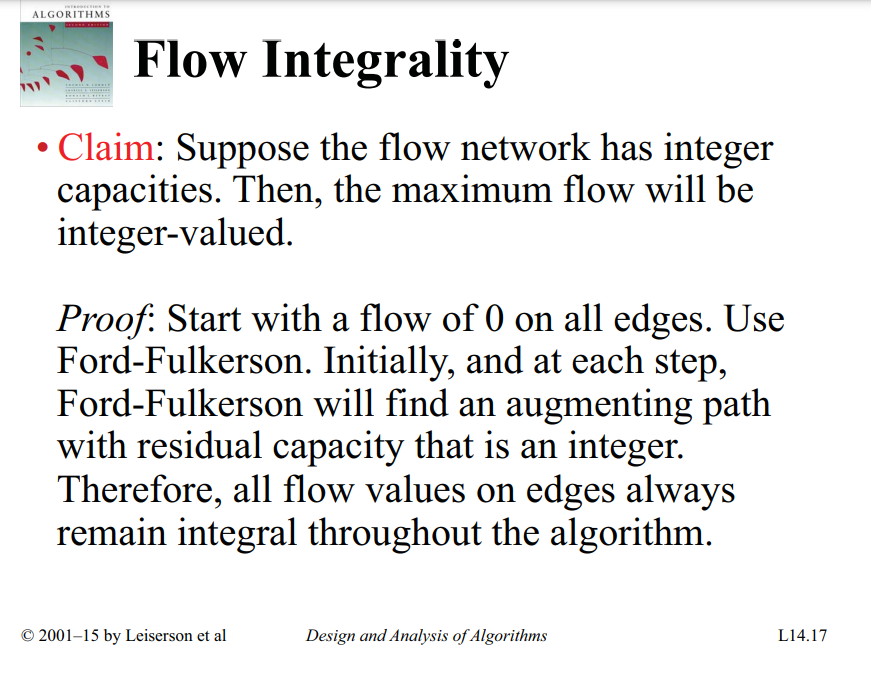

In [9]:
import networkx as nx
import numpy as np
import random

def is_flow_integral(graph, flow_value, flow_dict):
    """
    Check if the given flow in the graph is integral (all flow values are integers).

    Parameters:
        graph (nx.DiGraph): The flow network represented as a directed graph.
        flow_value (float): The total flow value computed by the maximum flow algorithm.
        flow_dict (dict): A dictionary containing flow values on edges.

    Returns:
        bool: True if the flow is integral, False otherwise.
    """
    # Iterate over edges in the graph
    for u, v in graph.edges():
        if (u, v) in flow_dict:
            # Check if the flow value on the edge is not an integer
            if not np.isclose(flow_dict[(u, v)], int(flow_dict[(u, v)])):
                return False
        else:
            # Check if the reverse edge (v, u) has a corresponding flow value
            if (v, u) in flow_dict:
                # Check if the flow conservation holds: flow(u, v) + flow(v, u) = 0
                if not np.isclose(flow_dict[(u, v)] + flow_dict[(v, u)], 0):
                    return False

    # Check if the total flow value is an integer
    if not np.isclose(flow_value, int(flow_value)):
        return False

    return True

# Example usage:
if __name__ == "__main__":
    # Create a directed graph for the flow network
    G = nx.DiGraph()

    # Add edges along with their capacities (all capacities are integers for flow integrality)
    G.add_edge('s', 'a', capacity=10)
    G.add_edge('s', 'b', capacity=5)
    G.add_edge('a', 'b', capacity=15)
    G.add_edge('a', 't', capacity=10)
    G.add_edge('b', 't', capacity=10)

    # Define source and sink nodes
    source_node = 's'
    sink_node = 't'

    # Compute maximum flow in the graph
    flow_value, flow_dict = nx.maximum_flow(G, source_node, sink_node)

    print(f"The maximum flow value from {source_node} to {sink_node} is: {flow_value}")
    print("Flow dictionary:")
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                print(f"Flow from {u} to {v}: {flow_dict[u][v]}")

    # Check if the computed flow is integral
    if is_flow_integral(G, flow_value, flow_dict):
        print("The maximum flow is integral.")
    else:
        print("The maximum flow is not integral.")


The maximum flow value from s to t is: 15
Flow dictionary:
Flow from s to a: 10
Flow from s to b: 5
Flow from a to t: 10
Flow from b to t: 5
The maximum flow is integral.


#Baseball Elimination


In [14]:
import networkx as nx
import numpy as np
from scipy.optimize import linprog

def baseball_elimination(teams, wins, remaining_games):
    num_teams = len(teams)
    team_indices = {team: idx for idx, team in enumerate(teams)}

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for teams and games
    team_nodes = []
    game_nodes = []

    for team in teams:
        G.add_node(team)

    source_node = "source"
    sink_node = "sink"

    G.add_node(source_node)
    G.add_node(sink_node)

    # Add edges between source and game nodes
    game_index = 0
    game_capacity = []
    for i in range(num_teams):
        for j in range(i + 1, num_teams):
            if remaining_games[i][j] > 0:
                game_node = f"game_{game_index}"
                G.add_node(game_node)
                G.add_edge(source_node, game_node, capacity=remaining_games[i][j])
                G.add_edge(game_node, teams[i], capacity=np.inf)
                G.add_edge(game_node, teams[j], capacity=np.inf)
                game_index += 1

    # Calculate maximum possible wins for each team
    max_wins = [wins[i] + sum(remaining_games[i]) for i in range(num_teams)]

    # Add edges between game nodes and sink node
    for team in teams:
        team_index = team_indices[team]
        max_possible_wins = max_wins[team_index]
        capacity_to_sink = max_possible_wins - wins[team_index]
        if capacity_to_sink < 0:
            capacity_to_sink = 0  # No capacity to sink if already exceeded max possible wins
        G.add_edge(team, sink_node, capacity=capacity_to_sink)

    # Use networkx maximum flow algorithm
    flow_value, flow_dict = nx.maximum_flow(G, source_node, sink_node)

    # Determine which teams are eliminated
    eliminated_teams = []
    for team in teams:
        if flow_value > wins[team_indices[team]]:
            eliminated_teams.append(team)

    return eliminated_teams

# Example usage
teams = ["A", "B", "C", "D"]
wins = [80, 81, 1, 1]
remaining_games = [
    [0, 1, 6, 1],
    [1, 0, 0, 0],
    [6, 0, 0, 3],
    [1, 0, 3, 0]
]

eliminated_teams = baseball_elimination(teams, wins, remaining_games)
print("Eliminated teams:", eliminated_teams)


Eliminated teams: ['C', 'D']


#Bipartite Matching


In [15]:
import networkx as nx

def bipartite_matching(set1, set2, edges):
    # Create a bipartite graph
    G = nx.Graph()

    # Add nodes from both sets
    G.add_nodes_from(set1, bipartite=0)
    G.add_nodes_from(set2, bipartite=1)

    # Add edges between nodes based on the provided edge list
    G.add_edges_from(edges)

    # Find maximum matching
    matching = nx.bipartite.maximum_matching(G, set1)

    return matching

# Example usage
set1 = {'A', 'B', 'C'}
set2 = {1, 2, 3}
edges = [('A', 1), ('A', 2), ('B', 2), ('C', 3)]

max_matching = bipartite_matching(set1, set2, edges)
print("Maximum Matching:", max_matching)

Maximum Matching: {'A': 1, 'B': 2, 'C': 3, 1: 'A', 2: 'B', 3: 'C'}
